# Enhancing Customer Churn Prediction with Machine Learning

## About Dataset


#### Context

Predict behavior to retain customers.
You can analyze all relevant customer data and develop focused customer retention programs.

#### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

-------------------
### Dataset:
You can use the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/versions/1) dataset from Kaggle.




The goal of this project is to predict customer churn (whether a customer will leave the telecom service) using a model stacking approach. Model stacking involves training multiple models and combining their predictions using another model.

### Steps:

**1. Import Libraries**: Import necessary libraries and initialize Comet ML.

**2. Load and Explore Data**: Load dataset and perform exploratory data analysis (EDA).

**3. Preprocessing**: Preprocess data by encoding and scaling features.

**4. Model Training**: Train multiple machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine.

**5. Hyperparameter Tuning**: Use Optuna to optimize hyperparameters for the models.

**6. Ensemble Modeling**: Create a stacking ensemble of models for improved predictions.

**7. Optimization Results**: Display the best hyperparameters and accuracy.

**8. End Experiment**: Conclude the Comet ML experiment.

This project will give you insights into dealing with classification problems, handling imbalanced datasets (if applicable), and utilizing model stacking to enhance predictive performance.

# 1. Import Libraries

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from keras import backend as K
from google.colab import drive
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Set the backend to Theano
#K.set_image_data_format('channels_last')
#K.set_floatx('float32')
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# 2. Load Data

In [ ]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()



Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Perform EDA on the Dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' column to numerical (its an object)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Drop rows with missing values
data.dropna(inplace=True)

## 3.1. Customer Churn Distribution

This plot shows the distribution of churn vs. non-churn customers. You can see the number of customers who have churned (left the telecom service) and those who have not.


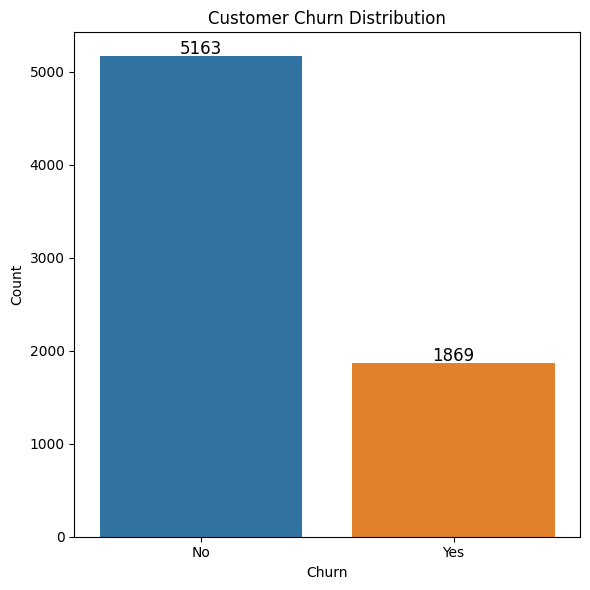

In [ ]:
# Plot 1: Class Distribution (Churn vs. Non-Churn)
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=data, x='Churn')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

# Adding data labels (rounded) to the bars
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 3.2. Numeric Feature Distribution:

These histograms show the distribution of numeric features (tenure, MonthlyCharges, and TotalCharges) for the entire dataset.

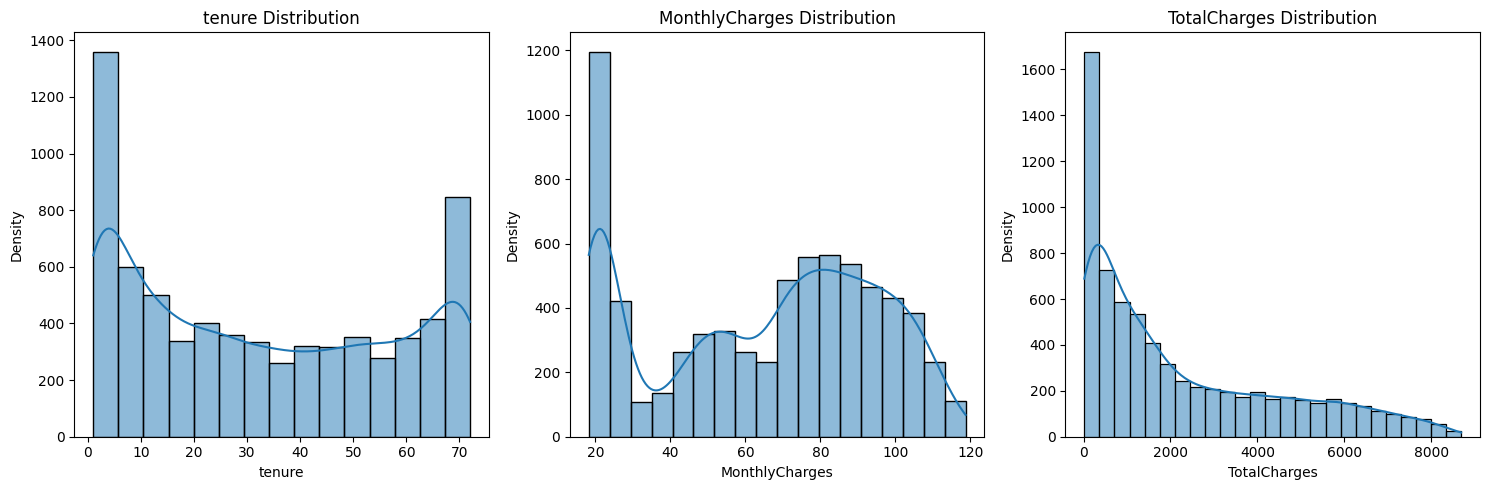

In [ ]:
# Plot 2: Numeric Feature Distribution
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')
# Log the plot to Comet

plt.tight_layout()
plt.show()

### 3.3. Categorical Feature Distribution:

These plots show the distribution of categorical features (gender, SeniorCitizen, Partner, Dependents, Contract, PaymentMethod) split by churn status.

These plots provide insights into how different categories of customers (e.g., seniors vs. non-seniors, customers with partners vs. without) are distributed in terms of churn. You can identify potential customer segments that are more likely to churn.



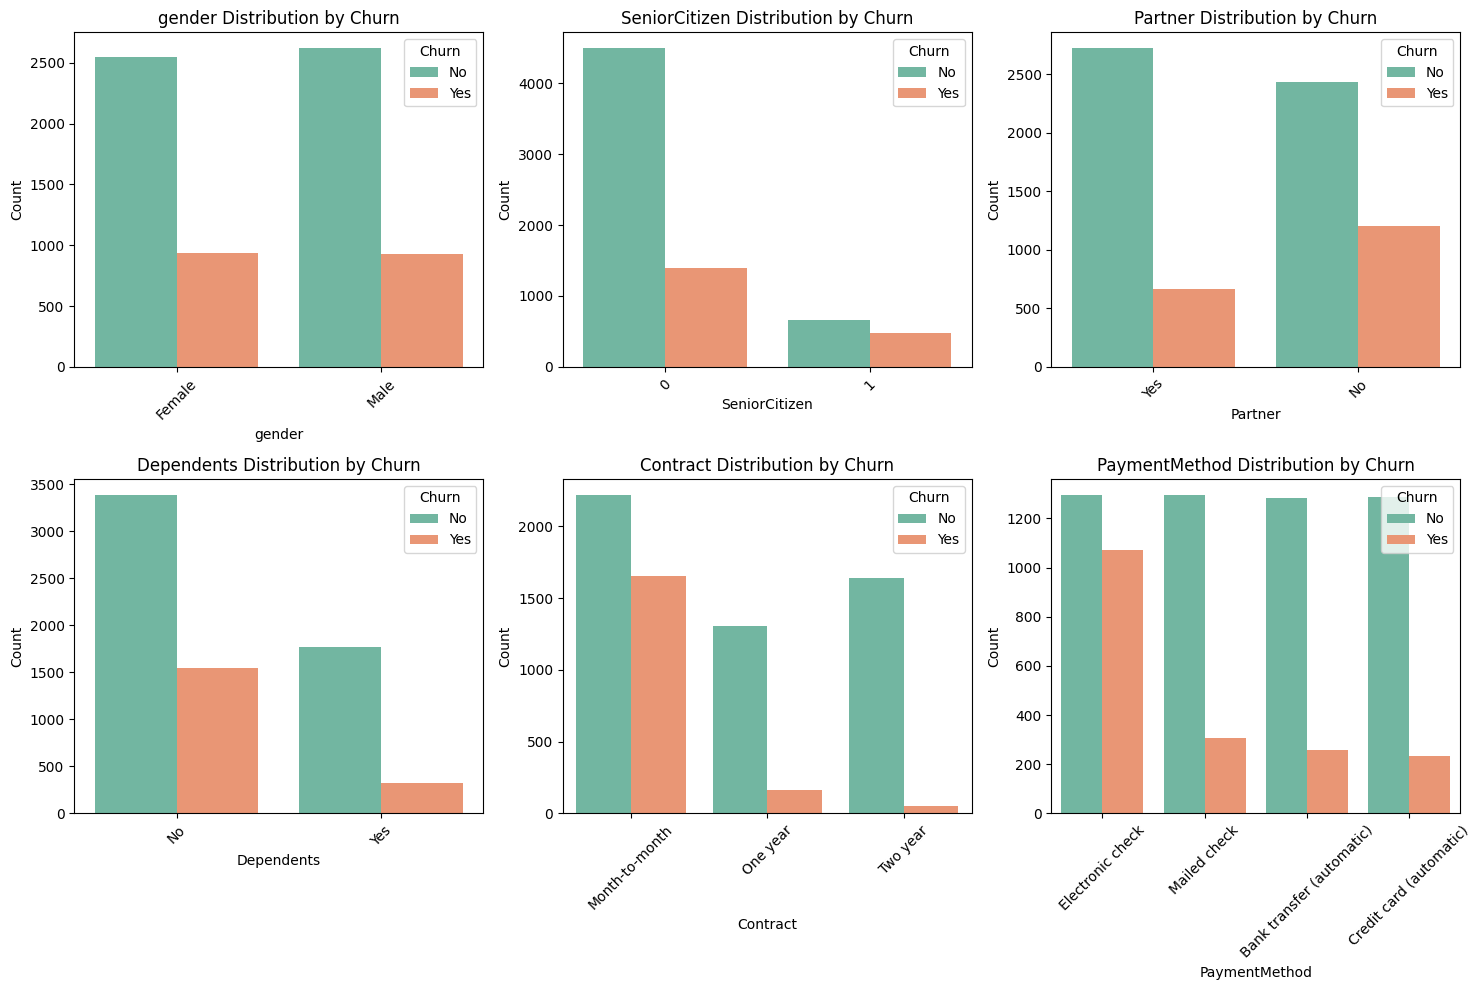

In [ ]:
# Plot 3: Categorical Feature Distribution
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='Set2')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.5. Monthly Charges vs. Total Charges:

This scatterplot shows the relationship between Monthly Charges and Total Charges, with points colored by churn status.

It appears that customers who have higher Total Charges are less likely to churn. This suggests that long-term customers who spend more are more loyal. You can use this insight to focus on retaining high-value, long-term customers by offering loyalty programs or incentives.
These business insights derived from EDA can guide feature engineering and model selection for your churn prediction project. They help you understand the data's characteristics and make informed decisions to optimize customer retention strategies.

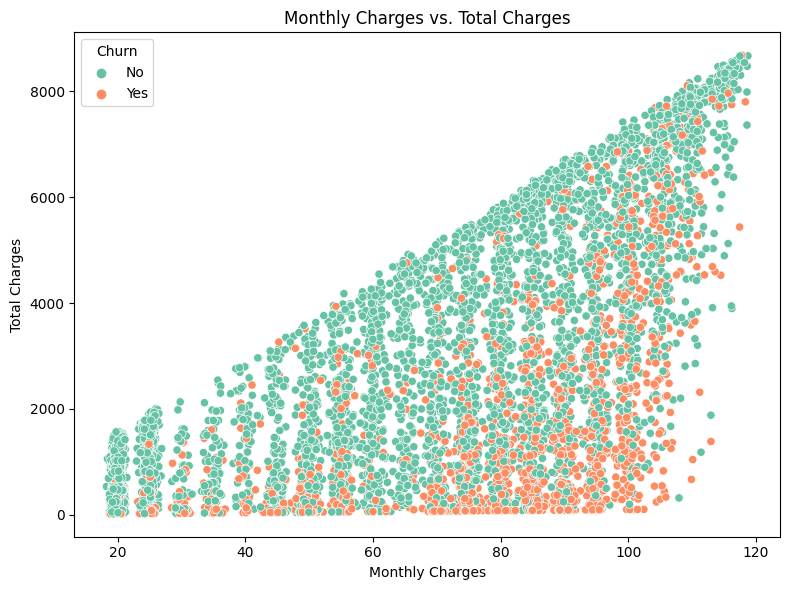

In [ ]:
# Plot 5: Monthly Charges vs. Total Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2')
plt.title("Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
# Log the plot to Comet
plt.tight_layout()
plt.show()

# 4. Preprocessing

In [ ]:
# Encode categorical features, scale numerical features

# Preprocessing
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(data.drop("Churn", axis=1), data["Churn"], test_size=0.2, random_state=42)

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_val_encoded = encoder.transform(X_val[categorical_features])

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_val_scaled = scaler.transform(X_val[numerical_features])

X_train_processed = np.concatenate((X_train_encoded, X_train_scaled), axis=1)
X_val_processed = np.concatenate((X_val_encoded, X_val_scaled), axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split data into features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(5625, 20)

# 5. Model Training

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from tensorflow.keras import Model
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
print("Data Type of y_train:", y_train.dtypes)
print("Unique Values in y_train:", y_train.unique())



Data Type of y_train: object
Unique Values in y_train: ['Yes' 'No']


In [ ]:
# Define sequential model
model = keras.Sequential([
    # Input layer with the number of features
    keras.layers.Input(shape=(X_train_processed.shape[1],)),
    keras.layers.Dense(19, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    # Output layer
    keras.layers.Dense(1, activation='sigmoid')
])
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)




# Compilation of neural networks.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Use y_train_encoded in model.fit
model.fit(X_train_processed, y_train_encoded, batch_size=25, epochs=100, verbose=1)

# Now we fit our model to training data
#model.fit(X_train_processed, y_train, batch_size=25, epochs=100, verbose=1)

# Evaluate on the validation set
#accuracy = model.evaluate(X_val_processed, y_val)[1]
#print("Validation Accuracy:", accuracy)


Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 0.5419 - accuracy: 0.7150
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.7870
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7940
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.7948
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.7929
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.7977
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4201 - accuracy: 0.7972
Epoch 8/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.7991
Epoch 9/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4192 - accuracy: 0.7989
Epoch 10/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4182 - accura